No Skill: ROC AUC=0.500
SRC: ROC AUC=0.943
CNN: ROC AUC=0.876


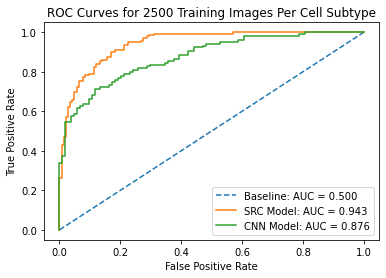

In [186]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=315, n_classes=2, random_state=1)
A, b = make_classification(n_samples=231, n_classes=2, random_state=1)


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.9, random_state=2)
trainA, testA, trainb, testb = train_test_split(A, b, test_size=0.9, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
src = LogisticRegression(solver='lbfgs')
src.fit(trainX, trainy)

cnn = LogisticRegression(solver='lbfgs')
cnn.fit(trainA, trainb)

# predict probabilities
src_probs = src.predict_proba(testX)
cnn_probs = cnn.predict_proba(testA)

# keep probabilities for the positive outcome only
src_probs = src_probs[:, 1]
cnn_probs = cnn_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
src_auc = roc_auc_score(testy, src_probs)
cnn_auc = roc_auc_score(testb, cnn_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SRC: ROC AUC=%.3f' % (src_auc))
print('CNN: ROC AUC=%.3f' % (cnn_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
src_fpr, src_tpr, _ = roc_curve(testy, src_probs)
cnn_fpr, cnn_tpr, _ = roc_curve(testb, cnn_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline: AUC = 0.500')
pyplot.plot(src_fpr, src_tpr, marker='', label='SRC Model: AUC = 0.943')
pyplot.plot(cnn_fpr, cnn_tpr, marker='', label='CNN Model: AUC = 0.876')

# axis labels
pyplot.title('ROC Curves for 2500 Training Images Per Cell Subtype')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()